In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/marketing_data.csv")

In [5]:
pd.options.display.max_columns = df.shape[1]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.rename({' Income ':'Income'}, axis=1, inplace=True)
df['Income'] = df['Income'].str.replace('$','').str.replace(',','').astype(float)

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df['Customer_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [12]:
df['Customer_age_grp'] = pd.cut(df.Customer_age, bins=[0,35,50,150], labels=['Adult','Middle','Old'])
df['Total_purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['Children'] = df['Kidhome']+df['Teenhome']

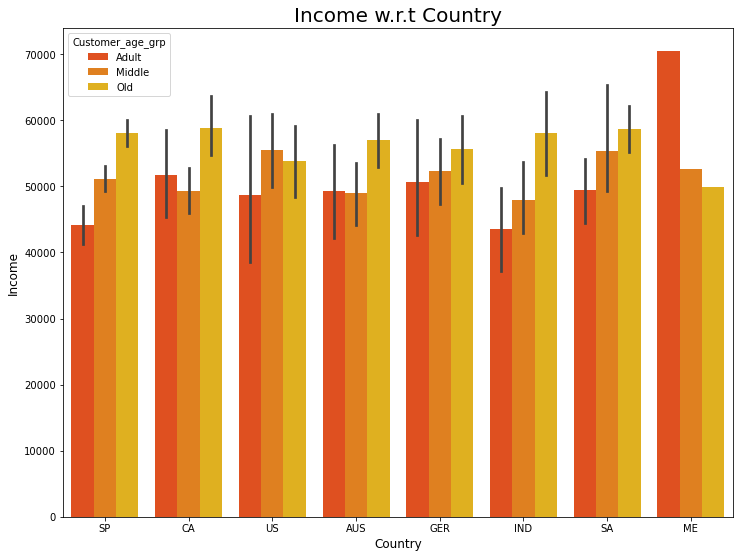

In [13]:
plt.figure(figsize=(12,9))

sns.barplot(x='Country', y='Income', hue='Customer_age_grp', data=df, estimator=np.mean, palette='autumn')
plt.title('Income w.r.t Country', fontsize=20)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Income',fontsize=12);

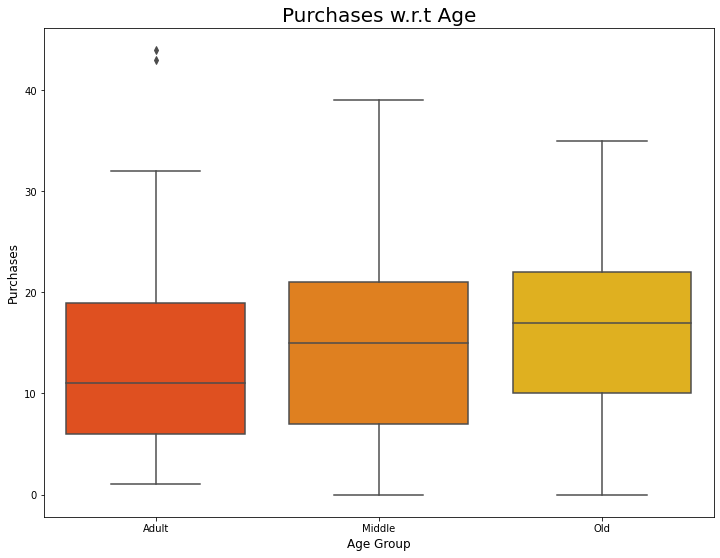

In [14]:
plt.figure(figsize=(12,9))

sns.boxplot(x='Customer_age_grp', y='Total_purchases', data=df, palette='autumn')
plt.title('Purchases w.r.t Age', fontsize=20)
plt.xlabel('Age Group',fontsize=12)
plt.ylabel('Purchases',fontsize=12);

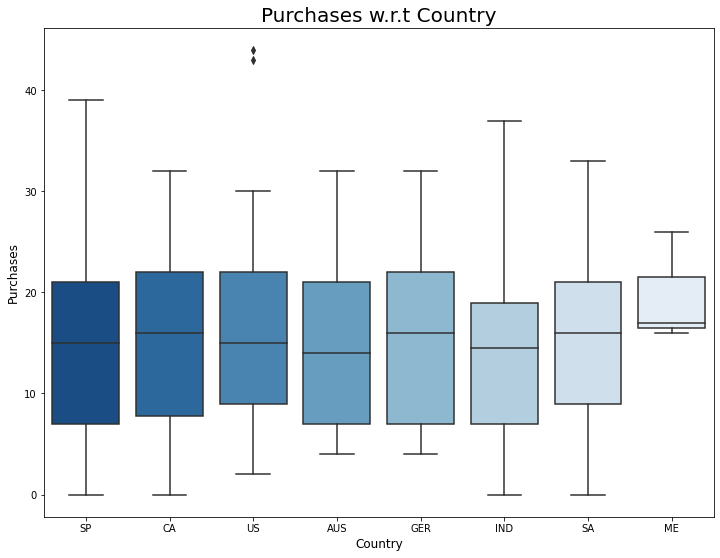

In [15]:
plt.figure(figsize=(12,9))

sns.boxplot(x='Country', y='Total_purchases', data=df, palette='Blues_r')
plt.title('Purchases w.r.t Country', fontsize=20)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Purchases',fontsize=12);

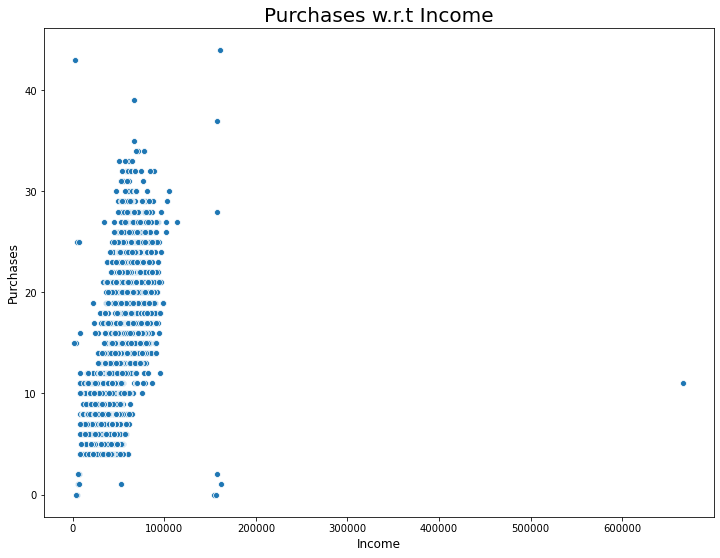

In [16]:
plt.figure(figsize=(12,9))

sns.scatterplot(x='Income', y='Total_purchases', data=df, palette='Blues_r')
plt.title('Purchases w.r.t Income', fontsize=20)
plt.xlabel('Income',fontsize=12)
plt.ylabel('Purchases',fontsize=12);

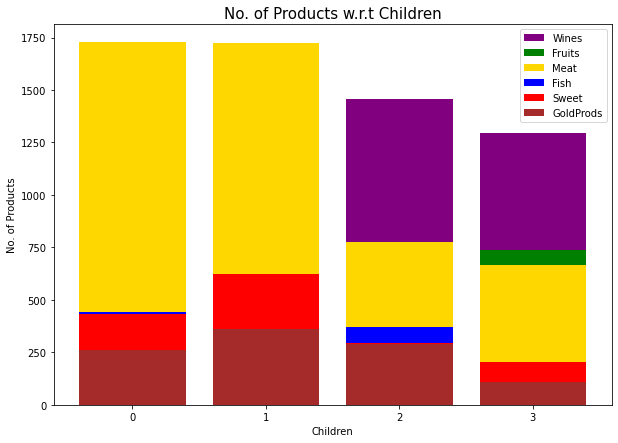

In [17]:
plt.figure(figsize=(10,7))

products = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

color = ['purple','green','gold','blue','red','brown']

for i,p,c in zip(range(1,len(products)+1),products,color):
    
    if i != 6:
        bottom = df[products[i]]
        plt.bar(x=df['Children'], height=df[p], color=c, bottom=bottom)
    else:
        plt.bar(x=df['Children'], height=df[p], color=c)
        
plt.xlabel('Children')
plt.ylabel('No. of Products')
plt.title('No. of Products w.r.t Children', fontsize=15)

plt.legend([p.replace('Mnt','').replace('Products','') for p in products])
plt.xticks(df['Children'].unique());

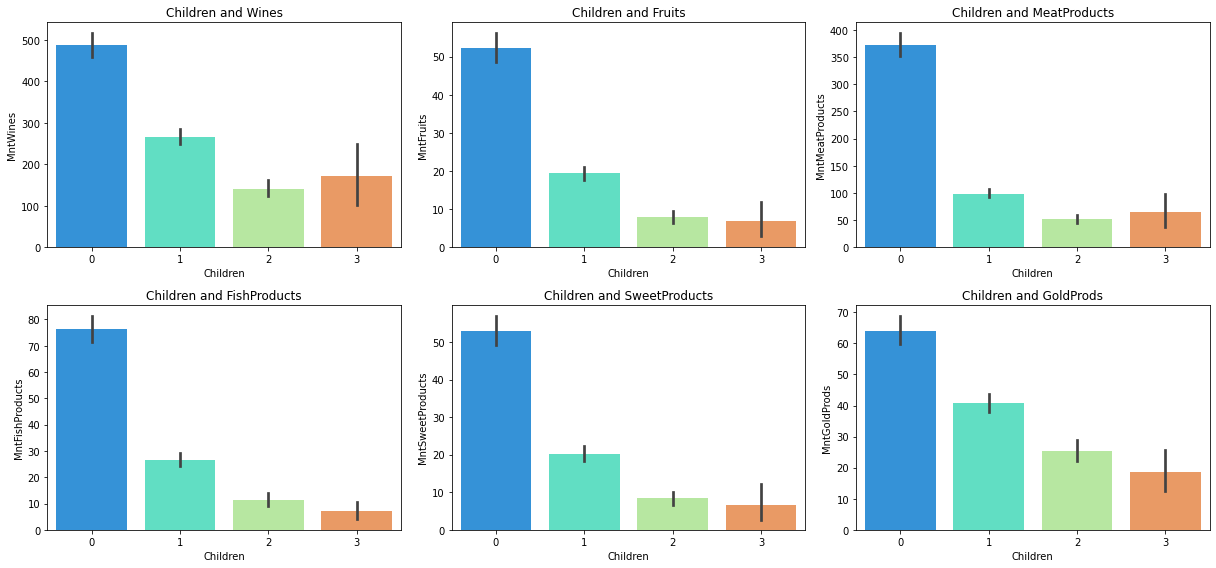

In [18]:
products = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

row, col = 2, 3
p=0

fig, ax = plt.subplots(row,col,figsize=(17,8))

for i in range(row):
    for j in range(col):
        plot = sns.barplot(x=df['Children'],y=df[products[p]], palette='rainbow', ax=ax[i,j])
        plot.set_title('Children and '+products[p].replace('Mnt',''))
        p += 1
fig.tight_layout();

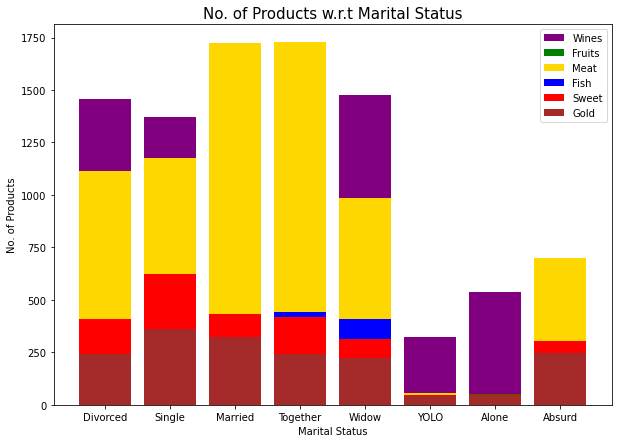

In [19]:
plt.figure(figsize=(10,7))

products = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

color = ['purple','green','gold','blue','red','brown']

for i,p,c in zip(range(1,len(products)+1),products,color):
    
    if i != 6:
        bottom = df[products[i]]
        plt.bar(x=df['Marital_Status'], height=df[p], color=c, bottom=bottom)
    else:
        plt.bar(x=df['Marital_Status'], height=df[p], color=c)
        
plt.xlabel('Marital Status')
plt.ylabel('No. of Products')
plt.title('No. of Products w.r.t Marital Status', fontsize=15)

plt.legend([p.replace('Mnt','').replace('Products','').replace('Prods','') for p in products])
plt.xticks(df['Marital_Status'].unique());

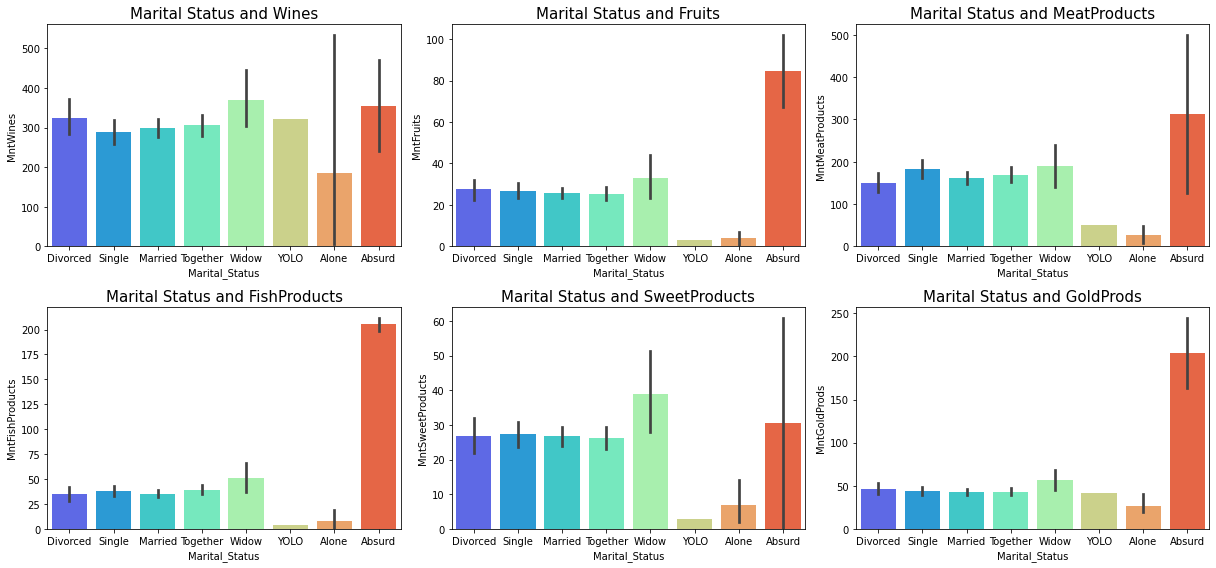

In [20]:
products = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

row, col = 2, 3
p=0

fig, ax = plt.subplots(row,col,figsize=(17,8))
#plt.subplots_adjust(bottom=0.7, top=1, wspace=0.8, hspace=0.1)

for i in range(row):
    for j in range(col):
        plot = sns.barplot(x=df['Marital_Status'],y=df[products[p]], palette='rainbow', ax=ax[i,j])
        plot.set_title('Marital Status and '+products[p].replace('Mnt',''), fontsize=15)
        p += 1
        
fig.tight_layout(); 

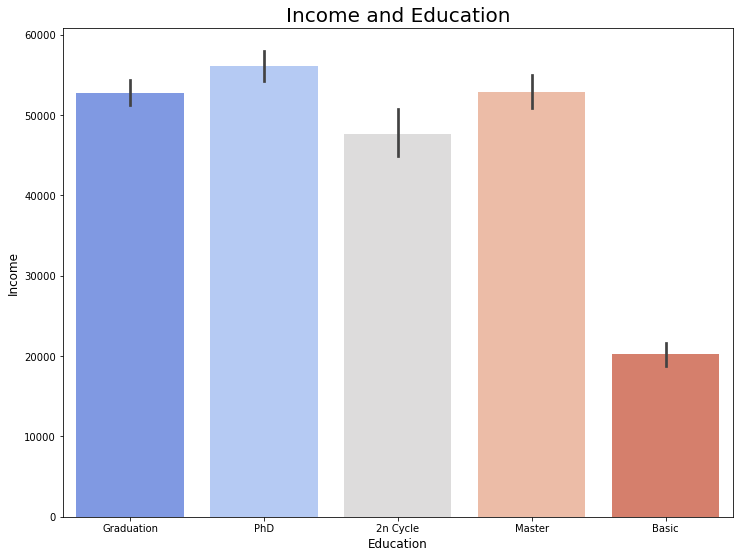

In [21]:
plt.figure(figsize=(12,9))

sns.barplot(x='Education', y='Income', data=df, estimator=np.mean, palette='coolwarm')
plt.title('Income and Education', fontsize=20)
plt.xlabel('Education',fontsize=12)
plt.ylabel('Income',fontsize=12);

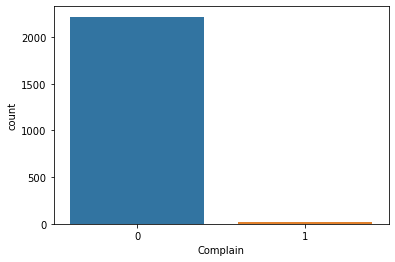

In [22]:
sns.countplot('Complain', data=df);